<a href="https://colab.research.google.com/github/devzohaib/Feature-Reduciton-Using-Pearson-Corelation/blob/master/Features_Selection_Using_Corelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection - How to drop features using Corelation

In this tutorial we will be removing the features that are highly corelated.In simple terms, let's suppose if we have 2 features X and Y , if X is increasing and Y is also increasing this means that both features are corelated. How much related? we will see this 

In [1]:
# Importing the data set and libraries

from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt


[load_boston() sklearn dataset doc](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)

In [2]:
_data = load_boston()
type(_data)

sklearn.utils.Bunch

Bunch objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key, bunch["value_key"], or by an attribute, bunch.value_key.

In [5]:
# Loading the dataset into DataFrame

df = pd.DataFrame(_data.data,columns=_data.feature_names)
df['TARGET'] = _data.target
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Brif summary of features and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.shape # No of sample in dataset 

(506, 14)

In [10]:
df.describe() # brif summary to dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


 what we have done so far is called EDA(Exploratory Data Analysis) also called the preprocessing , we have not covered in detail.

# Seperation of dataset into train and test

In [12]:
# seprating features and target
X = df.drop("TARGET",axis=1)   #Feature Matrix
y = df["TARGET"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=100)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [14]:
# corelation of features on X_train

X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.208449,0.429983,-0.050889,0.448920,-0.281843,0.380527,-0.396820,0.641012,0.599940,0.296722,-0.402397,0.519112
ZN,-0.208449,1.000000,-0.523667,-0.018782,-0.513734,0.300274,-0.578906,0.637188,-0.319592,-0.317453,-0.384091,0.178464,-0.411961
INDUS,0.429983,-0.523667,1.000000,0.029596,0.756082,-0.388389,0.630028,-0.694888,0.613884,0.737563,0.402873,-0.358160,0.600731
CHAS,-0.050889,-0.018782,0.029596,1.000000,0.041073,0.118925,0.063280,-0.073799,0.021043,-0.024427,-0.043804,0.050389,-0.062958
NOX,0.448920,-0.513734,0.756082,0.041073,1.000000,-0.286439,0.738958,-0.767202,0.630911,0.682250,0.198738,-0.381035,0.579224
RM,-0.281843,0.300274,-0.388389,0.118925,-0.286439,1.000000,-0.239898,0.196803,-0.206726,-0.283813,-0.326536,0.121983,-0.622520
AGE,0.380527,-0.578906,0.630028,0.063280,0.738958,-0.239898,1.000000,-0.762691,0.461071,0.500652,0.243816,-0.273663,0.598636
DIS,-0.396820,0.637188,-0.694888,-0.073799,-0.767202,0.196803,-0.762691,1.000000,-0.503238,-0.534968,-0.222402,0.296842,-0.487847
RAD,0.641012,-0.319592,0.613884,0.021043,0.630911,-0.206726,0.461071,-0.503238,1.000000,0.913284,0.467481,-0.419700,0.482472
TAX,0.599940,-0.317453,0.737563,-0.024427,0.682250,-0.283813,0.500652,-0.534968,0.913284,1.000000,0.463642,-0.419114,0.522254


Just by using the `corr()` function, you can see the corelation of all the features. by looking at value you can interpret so many things. one thing is to mention over here is that pearson corelation value ranges from -1 to 1. so to make it more visulaze format we use seaborn to plot the corelation.

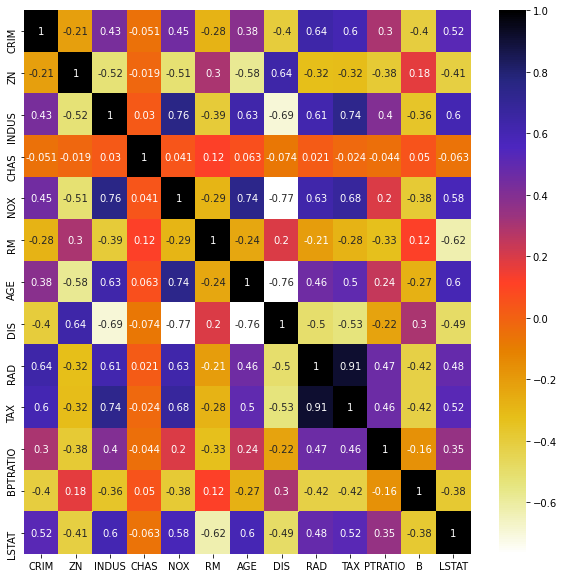

In [28]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# annot =True means , just write the data value in each cell
#cmapmatplotlib colormap name or object, or list of colors, optional
#The mapping from data values to color space. 
plt.show()

[seaborn heatmap doc](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

[cmap linear color args](https://www.cnblogs.com/YingxuanZHANG/p/8808077.html)
spend sometime seeing the heatmap we will able to see that while features are highly corelated , let see **TAX** and **RAD** both are highly corelated , means that either one can be drop ,this will not effect on the target feature.

In [ ]:
# let write a function that take corr matrix and threshold , return the list of feature that have that threshold corealtion


In [49]:

# with the following function we can select highly correlated features

def correlation(corr_matrix, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
corr_features = correlation(cor, 0.7)
len(corr_features)
print(corr_features)

{'DIS', 'TAX', 'NOX', 'AGE'}


We can drop these feature from the X_train , and also from the X_test without analysing on X_test data set.

In [51]:

X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
198,0.03768,80.0,1.52,0.0,7.274,2.0,12.6,392.20,6.62
229,0.44178,0.0,6.20,0.0,6.552,8.0,17.4,380.34,3.76
502,0.04527,0.0,11.93,0.0,6.120,1.0,21.0,396.90,9.08
31,1.35472,0.0,8.14,0.0,6.072,4.0,21.0,376.73,13.04
315,0.25356,0.0,9.90,0.0,5.705,4.0,18.4,396.42,11.50
...,...,...,...,...,...,...,...,...,...
272,0.11460,20.0,6.96,0.0,6.538,3.0,18.6,394.96,7.73
124,0.09849,0.0,25.65,0.0,5.879,2.0,19.1,379.38,17.58
178,0.06642,0.0,4.05,0.0,6.860,5.0,16.6,391.27,6.92
447,9.92485,0.0,18.10,0.0,6.251,24.0,20.2,388.52,16.44
